## 收集  
### 手头数据收集
- 直接加载手头文件：twitter-archive-enhanced.csv

In [1]:
# 加载包
import pandas as pd
import numpy as np

In [2]:
# 载入文件
archive = pd.read_csv('twitter-archive-enhanced.csv')

### 从互联网下载文件
- 利用requests库下载推特图像的预测数据

In [3]:
# 加载requests库
import requests, os

In [4]:
# 通过requests库访问URL
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# 下载tsv文件到文件夹中
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
prediction = pd.read_csv('image-predictions.tsv',sep = '\t')

### 读取本地json数据
- 逐行读取json文件，提取相关的数据写入到新的文件中

In [7]:
# 导入json包
import json

# 读取与写入
with open('tweet_json.txt', 'r', encoding = 'utf-8') as f1:
    with open('tweet_data.txt', 'w', encoding = 'utf-8') as f2: 
        for line in f1.readlines():
            data = json.loads(line)
            time = data["created_at"]
            tweet_id = data["id"]
            retweet_count = data["retweet_count"]
            favorite_count = data["favorite_count"]
            
            f2.write('{},{},{},{}\n'.format(tweet_id, time, retweet_count, favorite_count))

In [8]:
# 用pandas读取文件，添加列名
tweet = pd.read_csv('tweet_data.txt',names = ['tweet_id', 'time', 'retweet_count', 'favorite_count'])

**这样，我们收集到了三个数据集（archive，prediction和tweet）。**  
## 评估

### 质量问题：
#### 目测
 - archive表中47行的text列中的评分应该为13.5/10，而分子列数据为5
 - archive表的name列有一些错误的名字（比如有很多为"a"的值，很显然这不是狗狗的名字）
 - archive表中text列中有一些转发的推特文本
 - archive表缺少转发数和点赞数
 - archive表的floofer列应命名为floof
 
#### 编程
 - 三个表的tweet_id列数据都是int类型（应该修改为str类型）  
 - prediction表一共2075条数据，archive表中有2356条数据
 - archive表的timestamp列、tweet表的time列不是时间格式
 - archive表的最后4列（doggo、floofer、pupper、puppo）存在大量str类型的"None"
 - archive表的name列存在str类型的"None"
 - tweet表一共2352条数据

### 清洁度问题：
#### 目测
- archive表的最后4列（doggo、floofer、pupper、puppo）应合并一列
- archive表的source列应把文本拆分出来  

#### 编程
- tweet表的点赞数和转发数添加到archive表中
- prediction合并到archive表中


In [9]:
# 查看数据
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
tweet

,tweet_id,time,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8842,39492
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6480,33786
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4301,25445
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8925,42863
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9721,41016
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,3240,20548
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,2142,12053
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,19548,66596
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,4403,28187
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,7684,32467


In [12]:
# 查看各组数据的信息
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [14]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 4 columns):
tweet_id          2352 non-null int64
time              2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3), object(1)
memory usage: 64.4+ KB


In [15]:
# name列存在错误的名字，且有"None"字符串
archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
Daisy           7
an              7
Buddy           7
Bailey          7
Toby            7
Jack            6
Dave            6
Stanley         6
Rusty           6
Milo            6
Koda            6
Oscar           6
Jax             6
Bella           6
Leo             6
Scout           6
Alfie           5
             ... 
Traviss         1
Suki            1
incredibly      1
Swagger         1
William         1
Edd             1
Malikai         1
Maya            1
Dietrich        1
Barney          1
Kenzie          1
BeBe            1
Bauer           1
Pip             1
Zeek            1
Tonks           1
Devón           1
Tommy           1
Tove            1
Beebop          1
Wesley          1
Fabio           1
Link            1
Grey            1
Longfellow

In [16]:
# name列为非名字的数据
archive[archive.name.str.islower()].name

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

In [17]:
# source列字符串格式的html标签
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## 清理

In [18]:
# 备份数据
archive_clean = archive.copy()
prediction_clean = prediction.copy()
tweet_clean = tweet.copy()

### 质量
####  三个表的tweet_id列数据都是int类型
##### 定义
三个数据集的tweet_id改为str格式
##### 代码

In [19]:
archive_clean['tweet_id'] = archive_clean.tweet_id.astype('str')
prediction_clean['tweet_id'] = prediction_clean.tweet_id.astype('str')
tweet_clean['tweet_id'] = tweet_clean.tweet_id.astype('str')

##### 测试

In [20]:
archive_clean['tweet_id'].dtype, prediction_clean['tweet_id'].dtype, tweet_clean['tweet_id'].dtype

(dtype('O'), dtype('O'), dtype('O'))

####  archive表的timestamp列、tweet表的time列不是时间格式
##### 定义
将对应的列修改为时间格式
##### 代码

In [21]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
tweet_clean['time'] = pd.to_datetime(tweet_clean['time'])

##### 测试

In [22]:
archive_clean['timestamp'].dtype, tweet_clean['time'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

####  archive表中47行的text列中的评分应该为13.5/10，而分子列数据为5
##### 定义
将47行的分子值列的5改为13.5(excel中的47行对应archive表的索引为45）
##### 代码

In [23]:
archive_clean.loc[45, 'rating_numerator'] = 13.5

##### 测试

In [24]:
# 测试
archive_clean.loc[45, ]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2017-07-08 00:28:19
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                           13.5
rating_denominator                                                           10
name                                    

#### archive表的name列有一些错误的名字
##### 定义
将archive表的name列里的非名字字符串修改为空值
##### 代码

In [25]:
# 将错误的名字修改为空值
wrong_name = archive_clean[archive_clean.name.str.islower()]
name_list = list(wrong_name.name.values)
archive_clean.name.replace(name_list, np.nan, inplace = True)

In [26]:
# 将字符串"None"修改为空值
str_none = archive_clean[archive_clean.name == 'None']
str_none_list = list(str_none.name.values)
archive_clean.name.replace(str_none_list, np.nan, inplace = True)

##### 测试

In [27]:
# 错误名字已修改为空值
archive_clean[archive_clean.name.isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13.0,10,NaN,None,None,None,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14.0,10,NaN,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13.0,10,NaN,None,None,None,None


In [28]:
# 查找修改后的首字母不是大写的名字的数量
sum(archive_clean.name.str[0].str.isupper() == False)

# 结果为0，表示错误的名字已全部修改

0

#### 	archive表中text列中有一些转发的推特文本
##### 定义
retweeted_status_id列有内容的数据为转发数据，应该将其删除
##### 代码

In [29]:
# 删除转发数据
drop_index = archive_clean[archive_clean.retweeted_status_id.notnull()].index
archive_clean.drop(drop_index, inplace = True)

In [30]:
# 删除无用的转发信息列
archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#####  测试

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 178.4+ KB


#### archive表的floofer应该为floof
##### 定义
修改floofer列名和该列的值为floof
##### 代码

In [32]:
# 修改列名
new_name = {'floofer':'floof'}
archive_clean.rename(columns = new_name, inplace = True)

In [33]:
# 修改值
archive_clean.floof.replace('floofer', 'floof', inplace = True)

##### 测试

In [34]:
# 列名已修改
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floof', 'pupper', 'puppo'],
      dtype='object')

In [35]:
# 值已修改
archive_clean.floof.value_counts()

None     2165
floof      10
Name: floof, dtype: int64

#### archive表的最后4列（doggo、floofer、pupper、puppo）存在大量str类型的"None"
##### 定义
将字符串类型的"None"修改为空值
##### 代码

In [36]:
change_list = ['doggo', 'floof', 'pupper', 'puppo']
for col in change_list:
    str_none = archive_clean[archive_clean[col] == 'None']
    str_none_list = list(str_none[col].values)
    archive_clean[col].replace(str_none_list, np.nan, inplace = True)

##### 测试

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    87 non-null object
floof                    10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 178.4+ KB


In [38]:
# 查看这些列的字符串"None"值的数量，若都是0，表示修改成功
((archive_clean.doggo == 'None').sum(),
(archive_clean.floof == 'None').sum(),
(archive_clean.pupper == 'None').sum(),
(archive_clean.puppo == 'None').sum())

(0, 0, 0, 0)

### 整洁度
#### archive表的最后4列（doggo、floofer、pupper、puppo）应合并一列
用melt函数将4列合并，将一个狗狗有多个地位属性的值替换为"multiple"，最后删掉重复列
##### 代码

In [39]:
# 切分archive_clean数据
archive_cut = archive_clean.loc[:,['tweet_id','doggo', 'floof', 'pupper', 'puppo']]
archive_cut.head()

,tweet_id,doggo,floof,pupper,puppo
0,892420643555336193,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,NaN,NaN


In [40]:
# 用melt把最后4列转变为行
archive_cut = pd.melt(archive_cut, id_vars = ['tweet_id'], value_vars = ['doggo', 'floof', 'pupper', 'puppo'], 
              var_name = 'status', value_name = 'value')

In [41]:
# 挑选出非None的数据
archive_cut = archive_cut[archive_cut.value.notnull()]

In [42]:
# 删除value列
archive_cut = archive_cut.drop(['value'], axis = 1)
archive_cut.head()

,tweet_id,status
9,890240255349198849,doggo
40,884162670584377345,doggo
89,872967104147763200,doggo
97,871515927908634625,doggo
98,871102520638267392,doggo


In [43]:
# 将archive_cut合并到archive_clean中
archive_clean = pd.merge(archive_clean, archive_cut, on = ['tweet_id'], how = 'left')

In [44]:
# 将重复tweet_id列的status列更改为multiple
muti_row = archive_clean[archive_clean.tweet_id.duplicated(keep = False)]
archive_clean.loc[muti_row.status.index, 'status'] = 'multiple'

In [45]:
# 删除多余的重复tweet_id列
archive_clean.drop_duplicates( 'tweet_id', inplace = True)

In [46]:
# 删除doggo、floofer、pupper、puppo列
archive_clean.drop(['doggo', 'floof', 'pupper', 'puppo'], axis = 1, inplace = True)

##### 测试

In [47]:
# 多余列已删除
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2186
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     1391 non-null object
status                   344 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 152.9+ KB


In [48]:
# tweet_id列无重复
archive_clean.tweet_id.duplicated().sum()

0

In [49]:
# status列分类正确
archive_clean.status.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floof         9
Name: status, dtype: int64

#### archive表的source列应把文本拆分出来
##### 定义
把source列html格式的字符串中的文本用beautifulsoup解析出来，再添加到source列中
##### 代码

In [50]:
# 导入beautifulsoup包来解析html格式的source列
from bs4 import BeautifulSoup
new_source = []
for source in archive_clean.source.values:
    soup = BeautifulSoup(source, 'lxml')
    source_text = soup.a.text
    new_source.append(source_text)

In [51]:
# 将解析出来的文本代入到source列中
archive_clean['source'] = pd.Series(new_source)

##### 测试

In [52]:
# 更改成功
archive_clean.source.value_counts()

Twitter for iPhone     2030
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### tweet表的点赞数和转发数添加到archive表中
##### 定义
用merge函数将两个表合并，删除time列
##### 代码

In [53]:
# 用merge合并
archive_clean = pd.merge(archive_clean, tweet_clean, on = ['tweet_id'], how = 'left')

In [54]:
# 删掉time列
archive_clean.drop('time', axis = 1, inplace = True)

##### 测试

In [55]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2163 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     1391 non-null object
status                   344 non-null object
retweet_count            2175 non-null int64
favorite_count           2175 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 186.9+ KB


#### prediction合并到archive表中
##### 定义
用merge函数将两个表合并，删掉没有图片的数据
##### 代码

In [56]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 111.5+ KB


In [57]:
# 合并
archive_clean = pd.merge(archive_clean, prediction_clean, on = ['tweet_id'], how = 'left')

In [58]:
# 删除无图数据
archive_clean = archive_clean[archive_clean.jpg_url.notnull()]

##### 测试

In [59]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1982 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null int64
name                     1350 non-null object
status                   306 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf       

**这样，我们得到了一份清理后的数据，接下来将数据保存为csv格式文件**

In [60]:
# 保存为csv格式文件
archive_clean.to_csv('twitter_archive_master.csv', index = False)

## 探索分析
### 研究问题

In [61]:
# 读取数据
df = pd.read_csv('twitter_archive_master.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1982 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null int64
name                     1350 non-null object
status                   306 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  

#### 问题一：是否转发数越高的推特点赞数也越高？
##### 分析
我们可以通过构建转发数（retweet_count）和点赞数（favorite_count）的散点图来判断两者的关系
##### 代码

In [63]:
# 导入绘图包
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

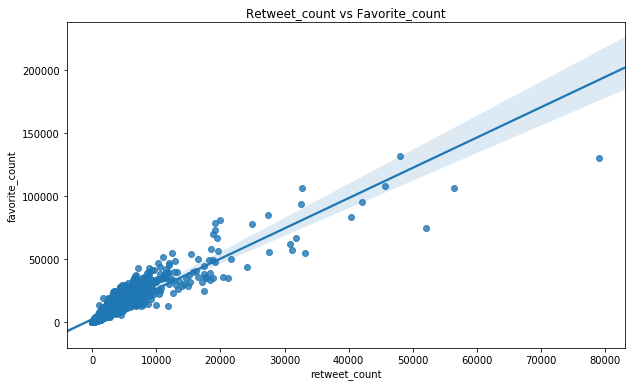

In [64]:
plt.figure(figsize=(10,6))
sns.regplot(df['retweet_count'], df['favorite_count'])
plt.title('Retweet_count vs Favorite_count');

#### 问题二：博主更喜欢用哪一种方式发推特？
##### 分析
我们可以根据这些狗狗推特的来源判断哪种最多
##### 代码

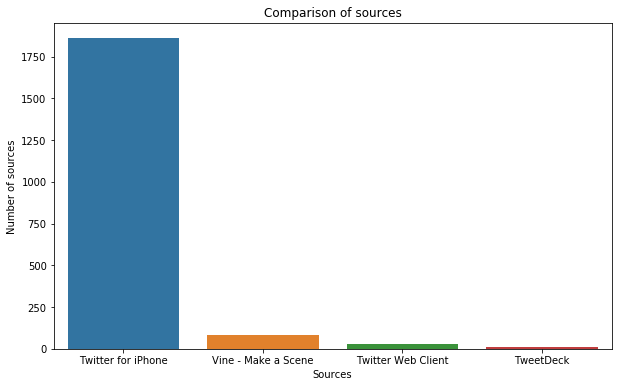

In [65]:
x = df.source.value_counts().index
y = df.source.value_counts().values
plt.figure(figsize=(10,6))
sns.barplot(x,y)
plt.xlabel('Sources')
plt.ylabel('Number of sources')
plt.title('Comparison of sources');

#### 问题三：哪种地位的狗狗最多？
##### 分析
查看各种地位狗狗的数量
##### 代码

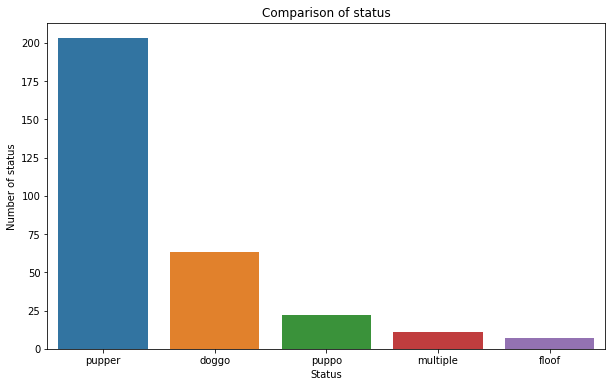

In [66]:
x = df.status.value_counts().index
y = df.status.value_counts().values
plt.figure(figsize=(10,6))
sns.barplot(x,y)
plt.xlabel('Status')
plt.ylabel('Number of status')
plt.title('Comparison of status');

### 结论
#### 结论一：转发数和点赞数成正相关，即一般转发数越高的推特，点赞数也比较高
#### 结论二：博主更多习惯用iphone客户端发推特
#### 结论三：分类为pupper“地位”的狗狗最多